# Predicting Car Prices

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
cars = pd.read_csv('imports-85.data', names=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'])

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
cars = cars.replace('?', np.nan)

In [7]:
cars[['symboling','normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']] = cars[['symboling', 'normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']].astype(float)

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null float64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 no

In [9]:
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [10]:
numeric_cars['normalized_losses'].value_counts(dropna=False, normalize=True)                              

NaN       0.200000
 161.0    0.053659
 91.0     0.039024
 150.0    0.034146
 104.0    0.029268
 134.0    0.029268
 128.0    0.029268
 94.0     0.024390
 74.0     0.024390
 85.0     0.024390
 103.0    0.024390
 168.0    0.024390
 95.0     0.024390
 102.0    0.024390
 65.0     0.024390
 93.0     0.019512
 148.0    0.019512
 106.0    0.019512
 122.0    0.019512
 118.0    0.019512
 83.0     0.014634
 154.0    0.014634
 125.0    0.014634
 137.0    0.014634
 101.0    0.014634
 115.0    0.014634
 89.0     0.009756
 110.0    0.009756
 145.0    0.009756
 119.0    0.009756
 197.0    0.009756
 164.0    0.009756
 108.0    0.009756
 188.0    0.009756
 129.0    0.009756
 81.0     0.009756
 192.0    0.009756
 158.0    0.009756
 153.0    0.009756
 87.0     0.009756
 194.0    0.009756
 113.0    0.009756
 121.0    0.004878
 98.0     0.004878
 186.0    0.004878
 78.0     0.004878
 107.0    0.004878
 77.0     0.004878
 90.0     0.004878
 256.0    0.004878
 231.0    0.004878
 142.0    0.004878
Name: normal

In [11]:
numeric_cars = numeric_cars.dropna(subset=['price'])

In [12]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [13]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null int64
highway_mpg          201 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(3)
memory usage: 23.6 KB


In [14]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [15]:
numeric_cars

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import trunc

In [17]:
def knn_train_test(train_c, target_c, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    divide = trunc(len(df)*.75)
    train_df = df[:divide].copy()
    test_df = df[divide:].copy()
    
    k_options = [1, 3, 5, 7, 9]
    k_rmses = {}
    for k in k_options:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_c]], train_df[target_c])
        predicted = knn.predict(test_df[[train_c]])
        rmse = (mean_squared_error(test_df[target_c], predicted))**0.5
        k_rmses[k] = rmse
    
    return k_rmses

In [18]:
continuous_values_cols

['normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [19]:
continuous_values_cols.remove('price')

In [20]:
continuous_values_cols

['normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg']

In [21]:
rmse_values = {}

In [22]:
for col in continuous_values_cols:
    rmses_dict = knn_train_test(col, 'price', numeric_cars)
    rmse_values[col] = rmses_dict

In [23]:
rmse_values

{'bore': {1: 7501.258872127176,
  3: 9582.477784260122,
  5: 8173.167717238993,
  7: 7789.231846870764,
  9: 6517.17626849584},
 'city_mpg': {1: 5352.066743919824,
  3: 3513.8566690506614,
  5: 3635.9338845128937,
  7: 3419.612802977688,
  9: 3292.4684712581534},
 'compression_ratio': {1: 9685.30389453071,
  3: 4311.282615263239,
  5: 5676.281281220075,
  7: 6623.011623029474,
  9: 6261.626339432078},
 'curb_weight': {1: 3708.950345672838,
  3: 2512.7548895736436,
  5: 2467.1015390375746,
  7: 2654.057385936321,
  9: 2635.034409709563},
 'height': {1: 11902.790106261871,
  3: 8573.619849805335,
  5: 6575.68118251772,
  7: 6255.294820111567,
  9: 5494.685228394637},
 'highway_mpg': {1: 4197.2298217360685,
  3: 3951.1269341934503,
  5: 2890.5559529029615,
  7: 2520.457478387633,
  9: 2357.025399721227},
 'horsepower': {1: 4944.29783670434,
  3: 4260.532262154899,
  5: 3822.8885837703365,
  7: 3937.8279681624913,
  9: 3660.4645019956647},
 'length': {1: 8344.680366063443,
  3: 5981.277074

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import collections

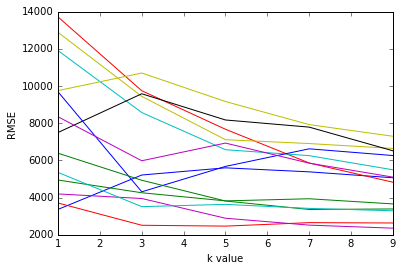

In [25]:
for k, v in rmse_values.items():
    ordered_v = collections.OrderedDict(sorted(v.items()))                                                                   
    x = list(ordered_v.keys())
    y = list(ordered_v.values())
    plt.plot(x, y)

plt.xlabel('k value')
plt.ylabel('RMSE')

In [26]:
def knn_train_test(train_c, target_c, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    divide = trunc(len(df)*.75)
    train_df = df[:divide].copy()
    test_df = df[divide:].copy()
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_c], train_df[target_c])
    predicted = knn.predict(test_df[train_c])
    rmse = (mean_squared_error(test_df[target_c], predicted))**0.5    
    return train_c, rmse
    

In [27]:
best_2_features = ['curb_weight', 'highway_mpg']
best_3_features = ['curb_weight', 'highway_mpg', 'city_mpg']
best_4_features = ['curb_weight', 'highway_mpg', 'city_mpg', 'width']
best_5_features = ['curb_weight', 'highway_mpg', 'city_mpg', 'width', 'horsepower']

In [28]:
rmse_2_features = knn_train_test(best_2_features, 'price', numeric_cars)
rmse_3_features = knn_train_test(best_3_features, 'price', numeric_cars)
rmse_4_features = knn_train_test(best_4_features, 'price', numeric_cars)
rmse_5_features = knn_train_test(best_5_features, 'price', numeric_cars)

In [29]:
rmse_2_features

(['curb_weight', 'highway_mpg'], 3071.6276959854845)

In [30]:
rmse_3_features

(['curb_weight', 'highway_mpg', 'city_mpg'], 2276.085310438112)

In [31]:
rmse_4_features

(['curb_weight', 'highway_mpg', 'city_mpg', 'width'], 2371.376033230578)

In [32]:
rmse_5_features

(['curb_weight', 'highway_mpg', 'city_mpg', 'width', 'horsepower'],
 2099.9169580219677)

In [33]:
def knn_train_test(train_c, target_c, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    divide = trunc(len(df)*.75)
    train_df = df[:divide].copy()
    test_df = df[divide:].copy()
    
    k_options = [x for x in range(1, 26)]
    k_rmses = {}
    for k in k_options:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_c], train_df[target_c])
        predicted = knn.predict(test_df[train_c])
        rmse = (mean_squared_error(test_df[target_c], predicted))**0.5
        k_rmses[k] = rmse
    
    return k_rmses

In [34]:
rmse_3_features = knn_train_test(best_3_features, 'price', numeric_cars)
rmse_4_features = knn_train_test(best_4_features, 'price', numeric_cars)
rmse_5_features = knn_train_test(best_5_features, 'price', numeric_cars)

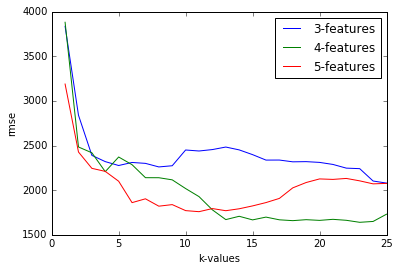

In [35]:
plt.plot(list(rmse_3_features.keys()), list(rmse_3_features.values()), label='3-features')
plt.plot(list(rmse_4_features.keys()), list(rmse_4_features.values()), label='4-features')
plt.plot(list(rmse_5_features.keys()), list(rmse_5_features.values()), label='5-features')
plt.xlabel('k-values')
plt.ylabel('rmse')
plt.legend()

In [36]:
rmse_4_features

{1: 3880.5342718875863,
 2: 2483.602516664918,
 3: 2418.6511694129917,
 4: 2207.362669489738,
 5: 2371.376033230578,
 6: 2285.358999725267,
 7: 2139.7598048400114,
 8: 2139.335444262068,
 9: 2115.538293980859,
 10: 2017.9793665747845,
 11: 1927.7423244442957,
 12: 1779.337393807644,
 13: 1670.233924645035,
 14: 1707.4056352259354,
 15: 1667.0645549107123,
 16: 1698.2674471572911,
 17: 1667.8729292570372,
 18: 1658.5543028171755,
 19: 1669.3248590318797,
 20: 1661.577951591705,
 21: 1673.211619346433,
 22: 1662.4040154053737,
 23: 1639.8652211421584,
 24: 1649.5688210696942,
 25: 1730.6481593469482}

Best prediction: 4 features, 23 nearest neighbors.